# COGS 108 - EDA Checkpoint

# Names

- Daniela Molina
- Gabriel Beal
- Marc Isaia
- Haoxuan Cui

<a id='research_question'></a>
# Research Question

There are currently a substantial amount of teenagers and young adults (ages 14-28) who use the top social media applications in the United States. Taking that into consideration, does extensive usage (2+ hours/day?) of the aforementioned applications by these users generate an onset of symptoms that correspond to the clinical criteria of an Anxiety Disorder and/or Depressive Disorder?

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Media_and_Mental_Health.csv")

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
# Rename columns
df.columns = ['time', 'gender', 'age', 'use social media', 'hours per day', 'days per week', 'check morning', 'check night', 'app count', 'start using', 'impact', 'mental health issues', 'suicidal thoughts', 'SM contributed', 'feedback']
# Remove responses with age over 28
df = df[df['age'] <= 28]
# Change yes and no to true and false
df = df.replace({"Yes": True, "No": False})
# Drop time column - not relevant to the research
df.drop(columns=['time'], inplace = True)
df["hours per day"] = df["hours per day"].str.replace(" hours", "")
df = df.replace({"Once a week": "1", "2-3 times a week": "2-3", "3-5 times a week": "3-5", "I use it every day":"7"})
df = df.replace({"Non-Binary ": "Non-binary", "Female- heads up this is worded ambiguously and people may interpret it as what gender they're attracted to": "Female"})
df['age'] = pd.to_numeric(df['age'])
df['impact'] = pd.to_numeric(df['impact'])

In [4]:
df_feedback = df
df = df.drop(columns=['feedback'])

In [5]:
# Additional data cleaning
df = df.replace({"a few times but have never acted on it": True, "Maybe ": "Prefer not to say", "Thought about it but can’t do it": True, "Passive suicidal thoughts. This means I do not really plan to ever commite sucide but instead just think about it as a option. Then, I snapped out of it because my mood imrpoves.": True})
df['suicidal thoughts'].value_counts()

False                95
True                 72
Prefer not to say    11
Name: suicidal thoughts, dtype: int64

In [6]:
df = df.replace({'Non-binary ': 'Non-binary', "Don’t know yet": "Prefer not to say"})
df['gender'].value_counts()

Male                 97
Female               73
Prefer not to say     5
Non-binary            5
Name: gender, dtype: int64

In [7]:
df['Depression'] = [False] * 180
df['Anxiety'] = [False] * 180

In [8]:
def checkDepression(string):
    if 'Depression' in string:
        return True
    else:
        return False

In [9]:
def checkAnxiety(string):
    if 'Anxiety' in string:
        return True
    else:
        return False

In [10]:
df['Depression'] = df['mental health issues'].apply(checkDepression)
df['Anxiety'] = df['mental health issues'].apply(checkAnxiety)

In [11]:
# Removing mental health issues due to the reduced scope of the question
df = df.drop(columns=['mental health issues'])

In [12]:
# Count how many social media apps they use (out of the options we gave)
def appCount(string):
    if 'None of the above' in string:
        return 0
    semicolons = string.count(';')
    return semicolons + 1

In [13]:
df['app count'].value_counts()

Facebook;Instagram;Snapchat;Twitter;TikTok           19
Instagram;Snapchat                                   16
Instagram;Snapchat;Twitter;TikTok                    13
Facebook;Instagram;Snapchat;TikTok                   13
Facebook;Instagram;Snapchat                          12
Instagram;Snapchat;Twitter                           12
Reddit                                               10
None of the above                                     8
Facebook;Instagram                                    7
Facebook;Instagram;Snapchat;Twitter                   7
Instagram;Twitter                                     7
Instagram;TikTok                                      6
Instagram;Twitter;TikTok                              5
Facebook;Instagram;Twitter;TikTok                     5
Instagram;Snapchat;TikTok                             5
Facebook;Instagram;Twitter                            4
Instagram                                             4
Snapchat;TikTok                                 

In [14]:
df['app count'] = df['app count'].apply(appCount)

In [15]:
df

,gender,age,use social media,hours per day,days per week,check morning,check night,app count,start using,impact,suicidal thoughts,SM contributed,Depression,Anxiety
0,Female,22,True,2-3,3-5,True,False,2,Middle School,6,True,Maybe,True,True
1,Female,22,True,1-2,7,False,True,4,High School,7,False,Maybe,True,True
2,Female,21,True,4+,7,True,True,4,Elementary School,5,False,True,True,False
3,Female,19,True,4+,3-5,True,True,4,Elementary School,3,True,True,True,True
4,Female,21,True,2-3,7,True,True,2,High School,4,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Male,24,True,3-4,7,True,True,1,Middle School,4,True,Maybe,True,True
178,Male,20,True,2-3,7,True,True,4,High School,5,False,False,False,False
179,Male,23,True,1-2,7,True,False,0,High School,3,False,True,False,False
180,Male,19,True,1-2,NaN,False,True,1,High School,5,True,False,False,False


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

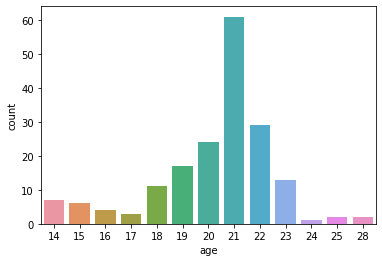

In [17]:
# Count plot
sns.countplot(x='age', data=df)

This plot illustrates the age counts of our dataset. We had a majority of 21 year olds respond to our survey, most likely because we shared this survey primarily amongst our college peers. This is due to the fact that we wanted responses from those who were more likely to grow up using social media.

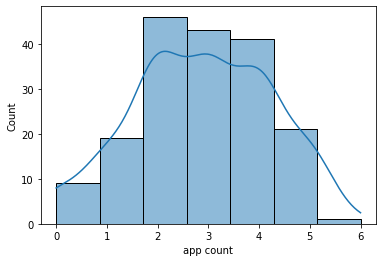

In [38]:
sns.histplot(df['app count'], bins=7, kde=True);

From our responses, users predominantly participate in 2 to 4 social media apps. From those with a count of 0, only one does not use social media, and the rest do use social media, but not the applications that we had listed.

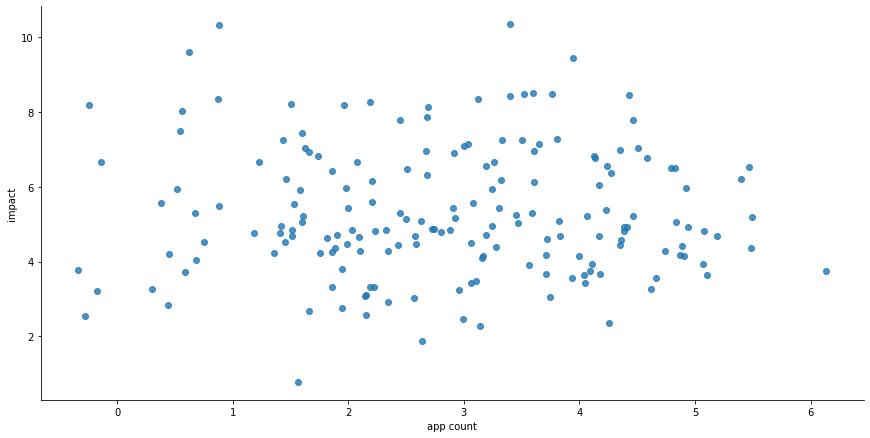

In [50]:
# jitter points to see relationship between quantitative variables
sns.lmplot(x='app count', y='impact', data=df, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

Impact represents how the user rates their social media use has impacted their mental health. The average impact from our responses leaned towards a positive one, but remained very close to neutral.

This scatterplot with jitterpoints represents the relationship between the number of social media apps that a user has and the impact it has on their mental health, with 0 being the most negative and 10 being the most positive. From this graph, we weren't able to ascertain a trend, but we did notice that there is higher density along the middle of the y-axis, which means that the impact for most individuals was close to neutral (5), no matter the amount of apps one uses. We can see that users with the most amount of apps responded with the most negative impact that social media has on their mental health.

In [51]:
df['impact'].mean()

5.294444444444444

In [52]:
df[df['gender']== 'Female']['impact'].mean()

5.260273972602739

In [53]:
df[df['gender']== 'Male']['impact'].mean()

5.350515463917525

In [54]:
df[df['gender'] == 'Non-binary']['impact'].mean()

5.8

In [55]:
df[df['gender']== 'Prefer not to say']['impact'].mean()

4.2

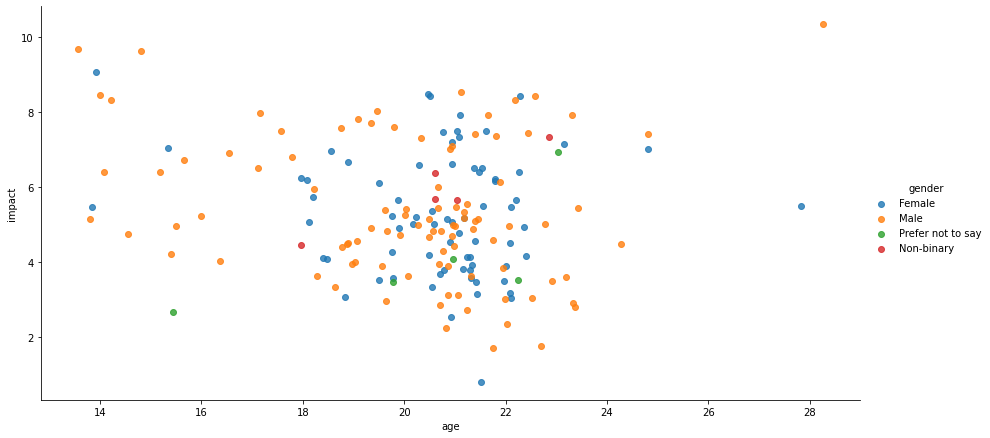

In [56]:
# jitter points to see relationship
sns.lmplot(x='age', y='impact', hue='gender', data=df, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

In this scatterplot we are observing the relationsip between app count and impact on mental health across the gender categories. From this visualization it is hard to spot a trend in either male, female, non-binary. However, we calculated the mean for the impact across all gender categories, and we found that they all average neutral but leaning slightly positive, except for the 'Prefer not to say' category, which averaged a 4.2.

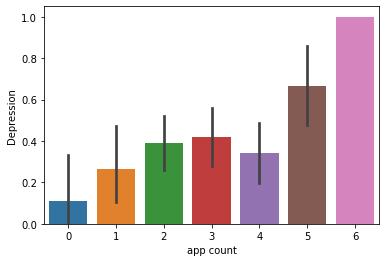

In [63]:
# ax = sns.boxplot(x='Depression', y='app count', data=df)
ax = sns.barplot(x='app count', y='Depression', data=df)

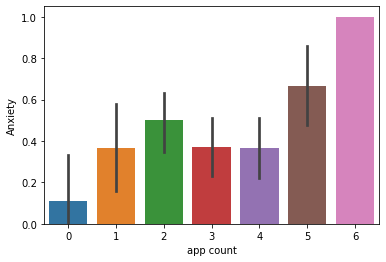

In [23]:
sns.barplot(x='app count', y='Anxiety', data=df);

From these two visualizations, we can see a slight positive correlation between app count and the two mental health disorders, Depression and Anxiety. As the amount of social media apps an individual uses on a regular basis increases, so do the average levels of Anxiety/Depression within that group of individuals. Although, 3 and 4 apps for Anxiety and 3 apps for Depression do not follow this trend.

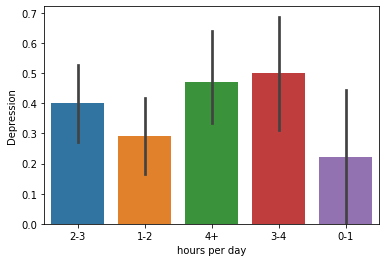

In [32]:
sns.barplot(x='hours per day', y='Depression', data=df);

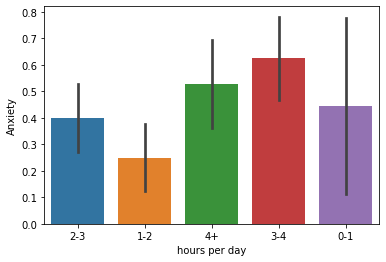

In [33]:
sns.barplot(x='hours per day', y='Anxiety', data=df);

Similar to the previous two visualizations, we can see that the hours per day a user spends on social media also has a slight positive correlation to depression and anxiety averages. For depression, the group of individuals that spend less time on social media per day experience less depression than the groups of individuals that spend more time on it. Anxiety follows a similar pattern, but with slight variations since those who used social media 0-1 hours per day have more collective anxiety than the group of individuals that use it 1-2 hours a day, but past that the collective anxiety levels rise.